In [1]:
#importing libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast

# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()
 
# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [2]:
df_DA = df[df['job_title_short'] == "Data Analyst"].copy()

In [3]:
df_DA['job_posted_month'] = df_DA['job_posted_date'].dt.month
df_DA_exploded = df_DA.explode("job_skills")
df_DA_pivot = df_DA_exploded.pivot_table(index="job_posted_month",columns='job_skills', aggfunc='size')
df_DA_pivot = df_DA_pivot.fillna(0)

In [4]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending= False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

In [5]:
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_month'] = df_DA_pivot['job_posted_month'].apply(lambda x: pd.to_datetime(x, format="%m").strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month')


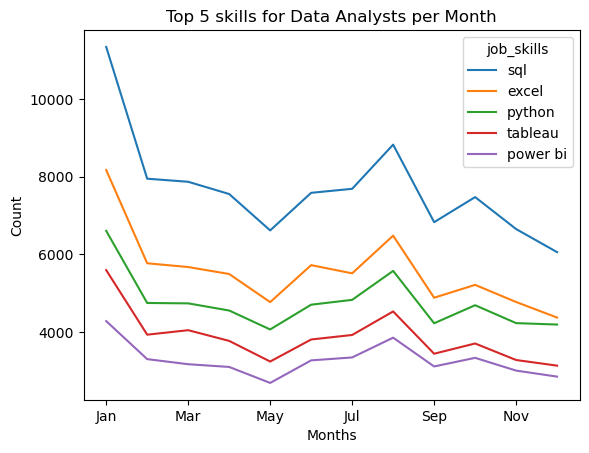

In [6]:
df_DA_pivot.iloc[:,: 5].plot(kind='line')
plt.title('Top 5 skills for Data Analysts per Month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()
